1000
0


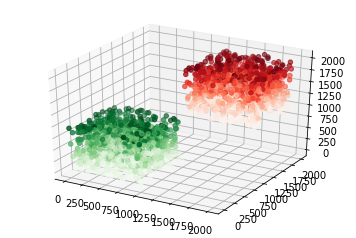

In [5]:
import random
from mpl_toolkits import mplot3d
import copy 
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
list1=[];
vector1=[];
list2 = [];
vector2 = [];
count = 0;
index = 0;
for n in range(3000):
    if(n % 3 == 0):
        vector1.append(random.randrange(1,1000,3));
    elif(n % 3 == 1):
        vector1.append(random.randrange(3,1000,3));
    elif(n % 3 == 2):
        vector1.append(random.randrange(6,1000,3));
        vector1.append(0);
        list1.append(vector1[:]);
        vector1.clear();
for n in range(3000):
    if(n % 3 == 0):
        vector2.append(random.randrange(1000,2000,3));
    elif(n % 3 == 1):
        vector2.append(random.randrange(1000,2000,3));
    elif(n % 3 == 2):
        vector2.append(random.randrange(1000,2000,3));
        vector2.append(1);
        list2.append(vector2[:]);
        vector2.clear();
print (len(list1));
for l in list1:
    for n in range(index+1,1000):
        if(l == list1[n]):
            count+=1;
    index+=1;
print (count);
X1 = [];
Y1 = [];
Z1 = [];
X2 = [];
Y2 = [];
Z2 = [];
for n in list1:
    X1.append(n[0]);
    Y1.append(n[1]);
    Z1.append(n[2]);
for n in list2:
    X2.append(n[0]);
    Y2.append(n[1]);
    Z2.append(n[2]);
ax.scatter3D(X1,Y1,Z1, c=Z1, cmap='Greens');
ax.scatter3D(X2,Y2,Z2,c=Z2,cmap='Reds');
    


        
        

